Label: [3]


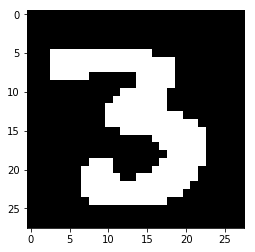

Label: [3]


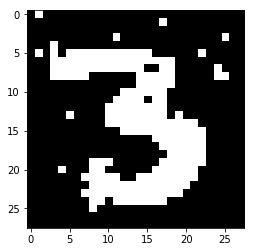

Label: [3]


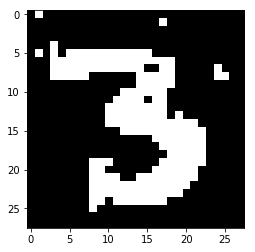

the least accuracy is 0.975765306122449 labeled [3]
Label: [1]


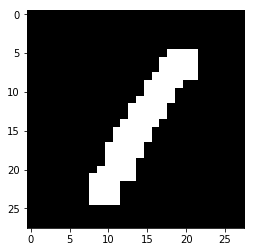

Label: [1]


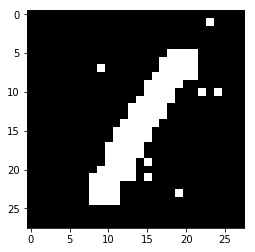

Label: [1]


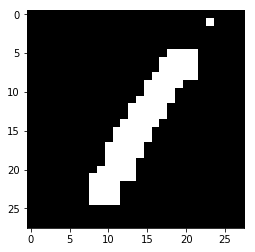

the largest accuracy is 0.9987244897959184 labeled [1]
the overall accuracy is  0.9894642857142857


In [3]:
from struct import unpack
import gzip
from numpy import zeros, uint8, float32
import numpy as np
from pylab import imshow, show, cm
import random

def get_noisy_data(imagefile, labelfile):
    """Read input-vector (image) and target class (label, 0-9) and return
       it as list of tuples.
    """
    # Open the images with gzip in read binary mode
    images = gzip.open(imagefile, 'rb')
    labels = gzip.open(labelfile, 'rb')

    # Read the binary data

    # We have to get big endian unsigned int. So we need '>I'

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)  # skip the magic_number
    N = labels.read(4)
    N = unpack('>I', N)[0]

    if number_of_images != N:
        raise Exception('number of labels did not match the number of images')
    N=500

    # Get the data
    x = zeros((N, rows, cols), dtype=float32)  # Initialize numpy array
    y = zeros((N, 1), dtype=uint8)  # Initialize numpy array
    z = zeros((N, rows, cols), dtype=float32)  
    c = zeros((N, rows, cols), dtype=float32)  

    for i in range(500):
        for row in range(rows):
            for col in range(cols):
                tmp_pixel = images.read(1)  # Just a single byte
                tmp_pixel = unpack('>B', tmp_pixel)[0]
                ran=(random.random()<0.02)
                c[i][row][col] = (-1)*(2.0*ran-1)*((tmp_pixel>0.5)*2-1)                
                x[i][row][col] = c[i][row][col]
                z[i][row][col]=((tmp_pixel>0.5)*2-1)
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]
    return (x,y, c,z)


def view_image(image, label=""):
    """View a single image."""
    print("Label: %s" % label)
    imshow(image, cmap=cm.gray)
    show()
#%%
data=get_noisy_data("train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz")
output=zeros((500,28,28), dtype=float32)
#%%

correct=0.0
wrong=0.0
maxErr=0.0
imgIdx=0
smaErr=100000
sindex=0
for imgIdx in range(500):
    miu=zeros((28,28))+0.5
    miu_pre=zeros((28,28))    
    while np.sum(abs(miu_pre-miu))>0.0001:
        miu_pre=miu
        for i in range(28):
            for j in range(28):
                neighbor=0
                if(i-1>0):
                    neighbor+=0.2*(2*data[0][imgIdx][i-1][j]-1)
                if(i+1<28):
                    neighbor+=0.2*(data[0][imgIdx][i+1][j]*2-1)
                if(j-1>0):
                    neighbor+=0.2*(data[0][imgIdx][i][j-1]*2-1)
                if(j+1<28):
                    neighbor+=0.2*(data[0][imgIdx][i][j-1]*2-1)
                    xinput=2*data[0][imgIdx][i][j]
                    miu[i][j]= np.exp(neighbor+xinput)/(np.exp(neighbor+xinput)+np.exp(-neighbor-xinput))
    picErr=0
    for i in range(28): 
        for j in range(28):
            x=data[0][imgIdx][i][j]
            output[imgIdx][i][j]=(-1)**(miu[i][j]**((1+x)/2)*(1-miu[i][j])**((1-x)/2) <0.5)*x 
            if output[imgIdx][i][j]!=data[3][imgIdx][i][j]:
                wrong+=1.0
                picErr+=1
            else:
                correct+=1.0
    if picErr>maxErr:
        maxErr=picErr
        index=imgIdx
    if picErr<smaErr:
        smaErr=picErr
        sindex=imgIdx
#%%%~
view_image(data[3][index],data[1][index])
view_image(data[0][index],data[1][index])
view_image(output[index],data[1][index])
print("the least accuracy is",(28*28-maxErr)/28.0/28.0,"labeled",data[1][index])
#%%
view_image(data[3][sindex],data[1][sindex])
view_image(data[0][sindex],data[1][sindex])
view_image(output[sindex],data[1][sindex])
print("the largest accuracy is", (28*28-smaErr)/28.0/28.0, "labeled",data[1][sindex])
#%%

print("the overall accuracy is ",correct/(correct+wrong))
#print(data[0][5])






